In [1]:
from pathlib import Path

In [3]:
DATA_ROOT = Path('./data')

In [4]:
images_to_check = list(DATA_ROOT.rglob('*.jpg'))
len(images_to_check)

586

In [17]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from random import sample, seed

def plot_images_grid(image_paths, rows, cols, figsize=(12, 8)):
    """
    Plot images in an MxN grid given their file paths.
    
    Parameters:
    - image_paths: List of image file paths
    - rows: Number of rows in the grid
    - cols: Number of columns in the grid
    - figsize: Tuple specifying the figure size (width, height)
    """
    # Verify we have enough images
    num_images = rows * cols
    if len(image_paths) < num_images:
        print(f"Warning: Only {len(image_paths)} images provided, but grid requires {num_images}.")
        num_images = len(image_paths)
    
    # Create figure and subplots
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Flatten axes array for easy iteration if grid is 2D
    if rows > 1 and cols > 1:
        axes = axes.ravel()
    
    # Plot each image
    for i in range(num_images):
        try:
            img = imread(image_paths[i])
            short_path = image_paths[i].relative_to(image_paths[i].parent.parent)
            if rows == 1 or cols == 1:
                # Handle 1D axes array
                if rows == 1 and cols == 1:
                    axes.imshow(img)
                    axes.axis('off')
                    axes.set_title(short_path)
                else:
                    axes[i].imshow(img)
                    axes[i].axis('off')
                    axes[i].set_title(short_path)
            else:
                # Handle 2D axes array
                axes[i].imshow(img)
                axes[i].axis('off')
                axes[i].set_title(short_path)
        except Exception as e:
            print(f"Error loading image {image_paths[i]}: {e}")
            # Display blank if image can't be loaded
            if rows == 1 or cols == 1:
                axes[i].axis('off')
            else:
                axes[i].axis('off')
    
    # Hide any remaining empty subplots
    for j in range(i+1, rows*cols):
        if rows == 1 or cols == 1:
            axes[j].axis('off')
        else:
            axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

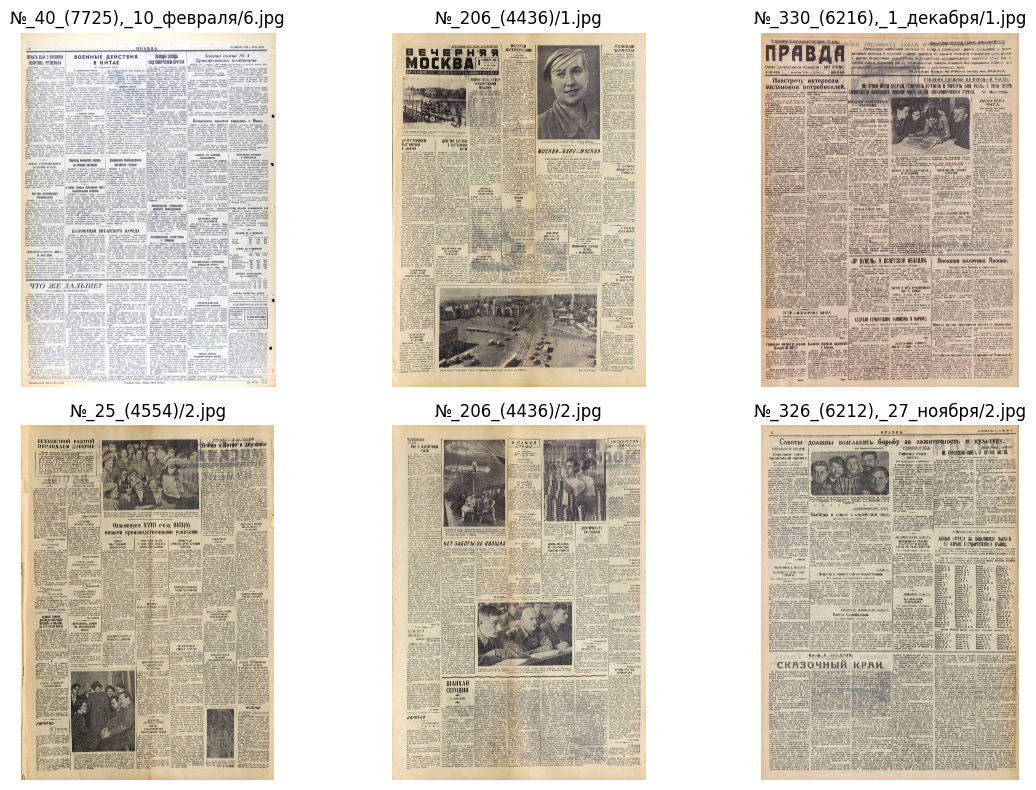

In [16]:
plot_images_grid(sample(images_to_check, 6), 2, 3)

In [36]:
import numpy as np
from PIL import Image
from tqdm import tqdm

def detect_white_area(image_path: str, white_threshold: int = 200, area_threshold: float = 0.3) -> bool:
    """
    Detect if an image has a large white area.
    
    Parameters:
    - image_path: Path to the image file
    - white_threshold: Pixel value threshold to consider as white (0-1)
    - area_threshold: Fraction of image area that must be white to be considered damaged
    
    Returns:
    - True if white area exceeds threshold, False otherwise
    """
    try:
        # Open image and convert to numpy array
        img = Image.open(image_path)
        img_array = np.array(img)
        
        white_pixels = np.min(img_array, axis=2) > white_threshold
        white_area_ratio = np.mean(white_pixels)
        
        return white_area_ratio > area_threshold
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return False

def filter_damaged_pages(image_paths: list[str], 
                         white_threshold: int = 200, 
                         area_threshold: float = 0.3) -> list[str]:
    """
    Filter out images that contain large white areas (presumed damaged pages).
    
    Parameters:
    - image_paths: List of image file paths
    - white_threshold: Pixel value threshold to consider as white (0-1)
    - area_threshold: Fraction of image area that must be white to be considered damaged
    
    Returns:
    - List of image paths that don't contain large white areas
    """
    good_images = []
    
    for img_path in tqdm(image_paths):
        if not detect_white_area(img_path, white_threshold, area_threshold):
            good_images.append(img_path)
    
    return good_images

In [50]:
filtered = filter_damaged_pages(images_to_check[100:], area_threshold=0.01, white_threshold=220)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 486/486 [06:07<00:00,  1.32it/s]


In [51]:
bad_pages = sorted(set(images_to_check[:50]) - set(filtered))
len(bad_pages)

50

In [54]:
filtered = filter_damaged_pages(bad_pages, area_threshold=0.02, white_threshold=220)
len(filtered)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:56<00:00,  1.13s/it]


50

In [55]:
bad_pages = sorted(set(bad_pages) - set(filtered))
len(bad_pages)

0

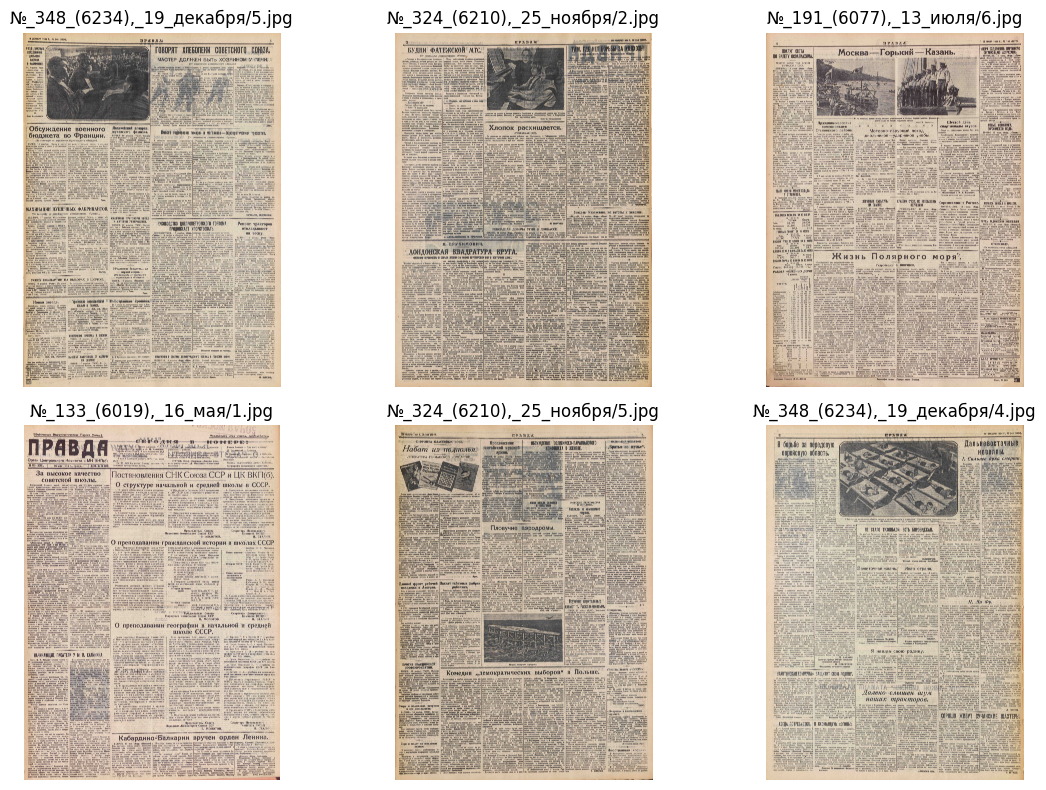

In [53]:
# plot_images_grid(sample(bad_pages, 6), 2, 3)